# Twitch platform Social Network Analysis
This dataset represents a social network of Twitch users collected via the public Twitch API in Spring 2018. Twitch is a live-streaming platform where people broadcast and watch real-time content, especially video-game playthroughs, esports, and creative streams. It also features interactive chat, letting viewers engage directly with streamers and communities

Each node corresponds to an individual user (often a viewer, not necessarily a streamer) and edges denote ***mutual follower relationships***  between user pairs. The resulting graph constitutes a single connected component. We decided to focus on the portuguese speakers subset of the dataset.

The dataset can be found in [kaggle](https://www.kaggle.com/datasets/andreagarritano/twitch-social-networks?select=FR)

In [7]:
from utils import *

G = nx.read_edgelist("data/twitch/musae_PTBR_edges.csv", delimiter=",", nodetype=int, comments="f")
G, df = load_twitch_user_attributes(G)

We also know some extra attributes of the users:
        
- account_age_days: The age of the user’s account, measured in days since creation at the time the data was collected.
- is_mature: A boolean flag indicating whether the user’s channel is marked as containing mature or adult-oriented content.
- total_views: The total number of views the user’s Twitch channel has received.
- is_partner: Indicates whether the user is a Twitch Partner, a verified status given to established streamers with significant viewership 

Now we can visualize the graph to get a better understanding:

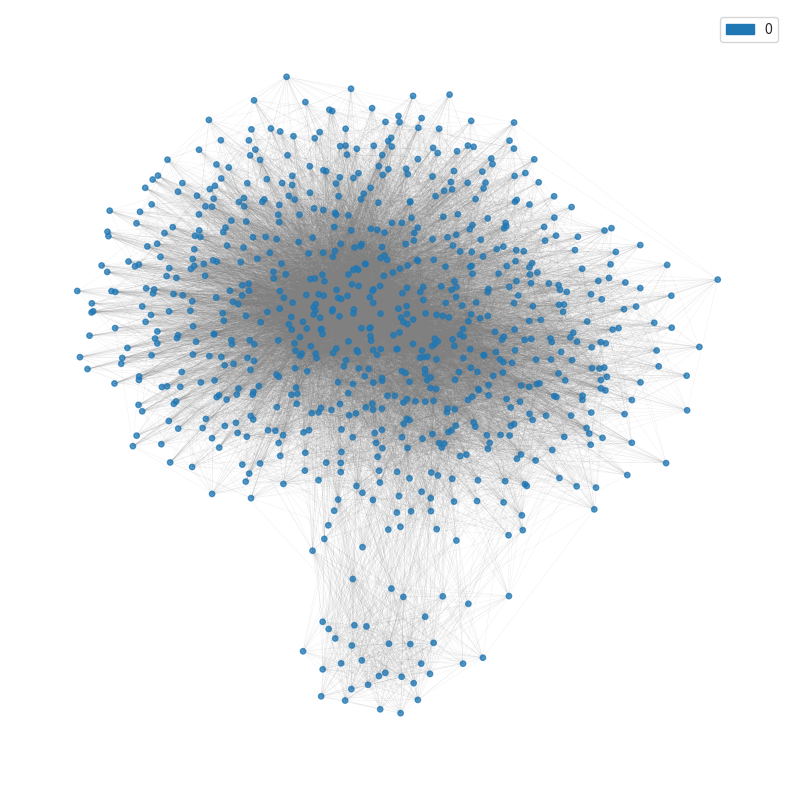

In [8]:
#visualize_static_entire_graph(G, node_size= 25)
generic_show_static(G, node_size=15, k_core=20)

Now we can do an interactive visualization that also shows the attributes for each node. Also we keep the nodes of k_core 10 to showcase the more important nodes:

In [9]:
#generic_show(G, node_color='blue', node_size=20, node_tooltip=["id", "account_age_days", "total_views", "is_partner", "is_mature"], k_core=10)


Next, the graph summary statistics:

In [10]:
summary_stats(G)

Number of nodes: 1912
Number of edges: 31299
Average degree: 32.74
Density: 0.0171
Average clustering coefficient: 0.3199
Graph is connected.
Radius: 4
Diameter: 7
Average shortest path length: 2.53


#### Insights
The Portuguese Twitch dataset shows a graph that is fairly large but also very well connected. Even though there are almost two thousand users, the network is fully connected, meaning everyone is reachable through others (no isolated component) which makes sense since gamers usually play and watch multiple games. On average, each user is connected to about 33 others, which helps explain why the average distance between any two people is only about 2-3 hops. The diameter of 7 and radius of 4 also suggest that no one is ever too far from anyone else. Even though the overall density is low, as is normal for social networks, the clustering coefficient is pretty high, meaning friends of a user are often friends with each other (holding the triadic closure). Overall, it looks like a close-knit community where information and interactions can spread quite fast.


### Attribute exploration
Next we can explore the attributes associated with each node to find some interesting insights:

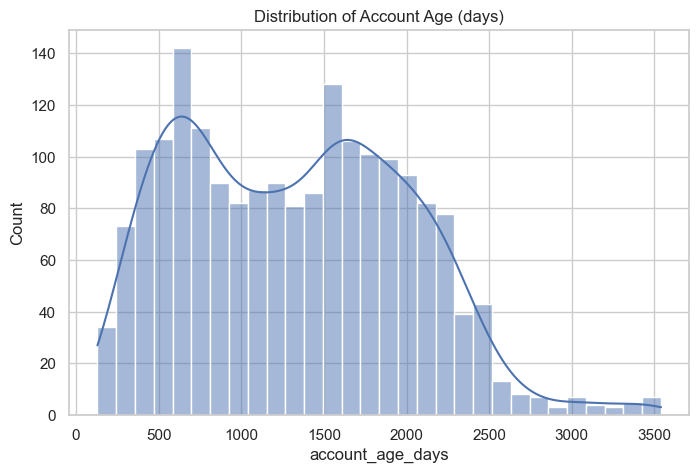

The distribution of account age shows a broad spread with two noticeable peaks around 600 and 1600 days, indicating both a large group of relatively new users and a substantial cluster of long-standing accounts, while very old accounts (3000+ days) are rare.

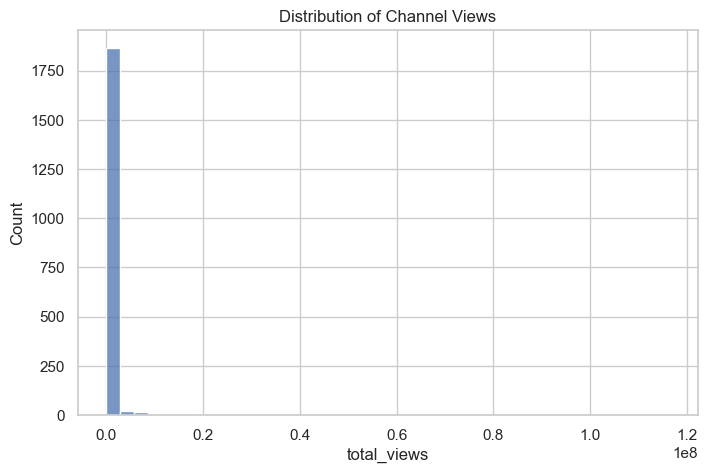

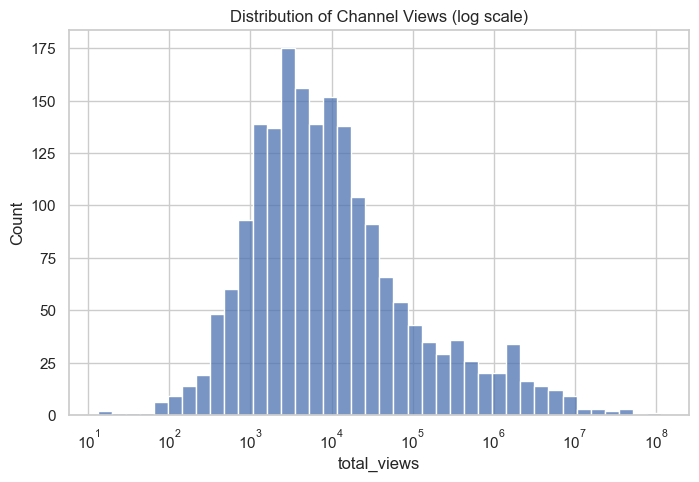

The distribution of channel views is heavily right-skewed, with most streamers clustered between 1,000 and100,000 views while a small number of outliers reach into the millions, highlighting a strong popularity imbalance on the platform.

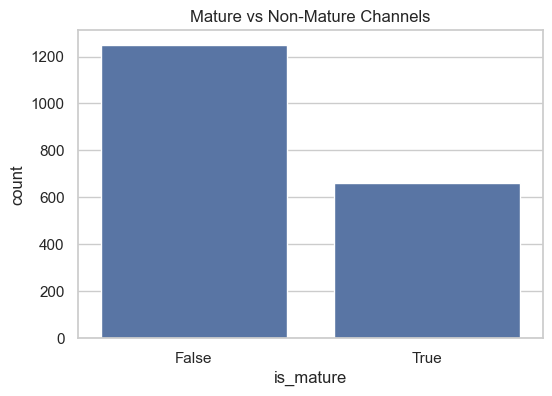

Percentage of mature indicated channels: 34.57%


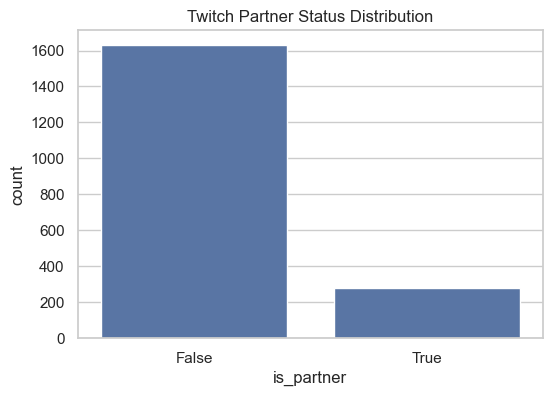

Percentage of Twitch Partners: 14.59%


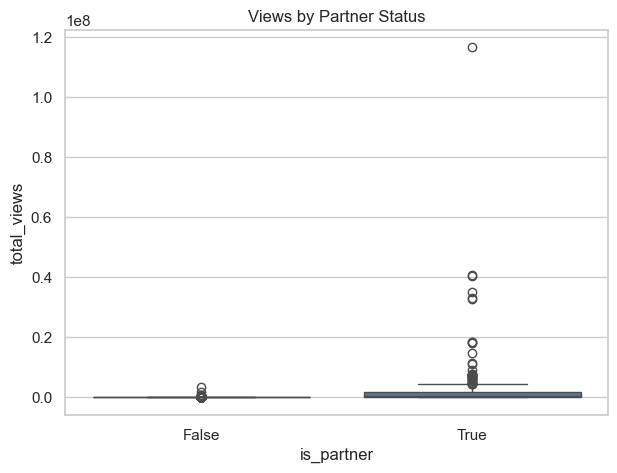

Partnered streamers have dramatically higher view counts than non-partners,with most of the extreme outliers concentrated in the partner group, highlighting astrong divide in visibility and reach between the groups.

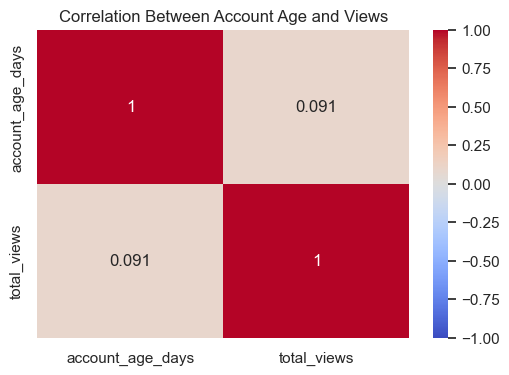

There is only a very weak positive correlation between account age and total views,suggesting that simply having an older Twitch account does not correspond to how many views achannel gets.

Summary statistics:
      account_age_days total_views
count             1912        1912
mean              1327      408715
std                685     3454463
min                129           0
25%                716        2015
50%               1316        6706
75%               1854       31372
max               3541   116392808 

Average views by partner status:
is_partner
False      19124
True     2689010
Name: total_views, dtype: object 

Average account age by mature flag:
is_mature
False    1338
True     1308
Name: account_age_days, dtype: object 

Top 10 most viewed accounts:
        id total_views account_age_days is_partner is_mature
1488   290   116392808             1896          1         0
945   1320    40659090             2490          1         0
601    103    40456102             2454          1         0
315   1739    35175114             1781          1         0
1443  1660    33101623             2024          1         0
1410   127    32672093             1592  

/Users/alfio/projects/massive_graph/community_detection/utils.py:772: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[['account_age_days', 'total_views']].describe().applymap(lambda x: f"{x:.0f}"), "\n")
/Users/alfio/projects/massive_graph/community_detection/utils.py:783: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x), "\n")
/Users/alfio/projects/massive_graph/community_detection/utils.py:787: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x), "\n")


In [11]:
twitch_user_exploratory_analysis(df)

Also, the degree distribution and clique size distribution:

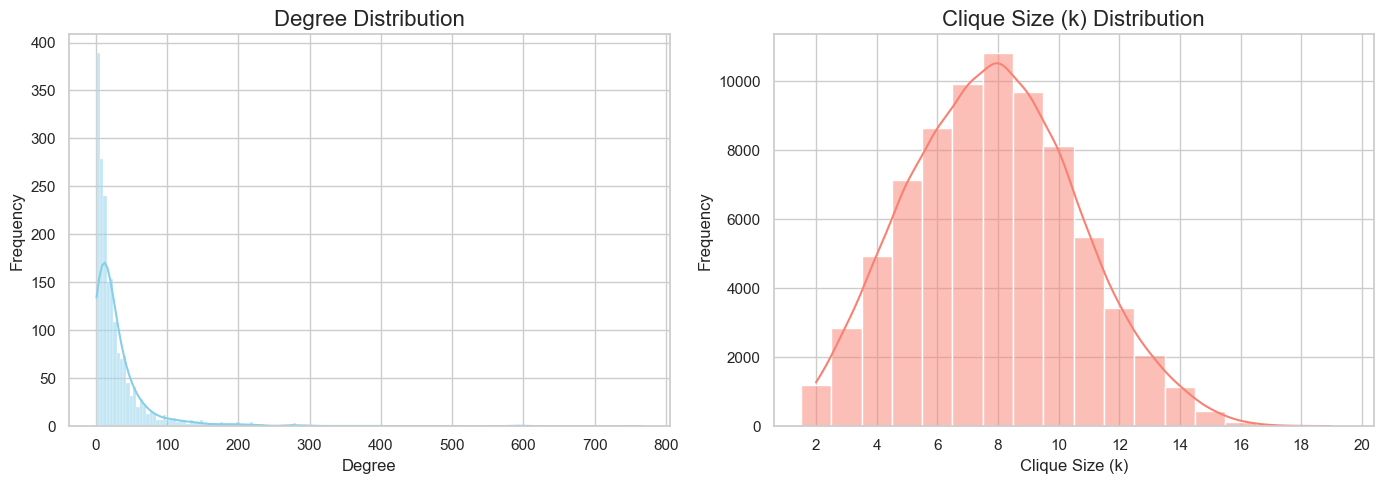

In [12]:
hist_degrees_cliques_computed(G)

The degree distribution is extremely right-skewed, showing that while most Twitch users have only a small number of mutual follower connections, a small set of highly connected nodes reach degrees above 500–700.

The clique size distribution peaks around 7–9 members, suggesting that Twitch users commonly form moderately sized, tightly connected groups, while very large cliques are rare, showing the presence of strong local communities but limited extremely dense subgraphs.The size of the clique makes sense since in most video games not more than 10 players can play at the same time.

### Centralities Analysis
#### Degree Centrality


Top 10 nodes by degree centrality:

 node   degree  raw_degree   id  account_age_days  is_mature  total_views  is_partner
  127 0.401361         767  127              1592      False     32672093        True
 1476 0.312925         598 1476              2195      False     18475754        True
  290 0.308739         590  290              1896      False    116392808        True
 1297 0.307169         587 1297              2215      False      7724802        True
  467 0.304553         582  467              1774      False     11392773        True
 1660 0.248561         475 1660              2024      False     33101623        True
   67 0.237572         454   67              1660       True      6905465        True
 1320 0.217687         416 1320              2490      False     40659090        True
 1758 0.206175         394 1758              1359      False      4397521        True
 1259 0.201465         385 1259              2153      False     17962557        True



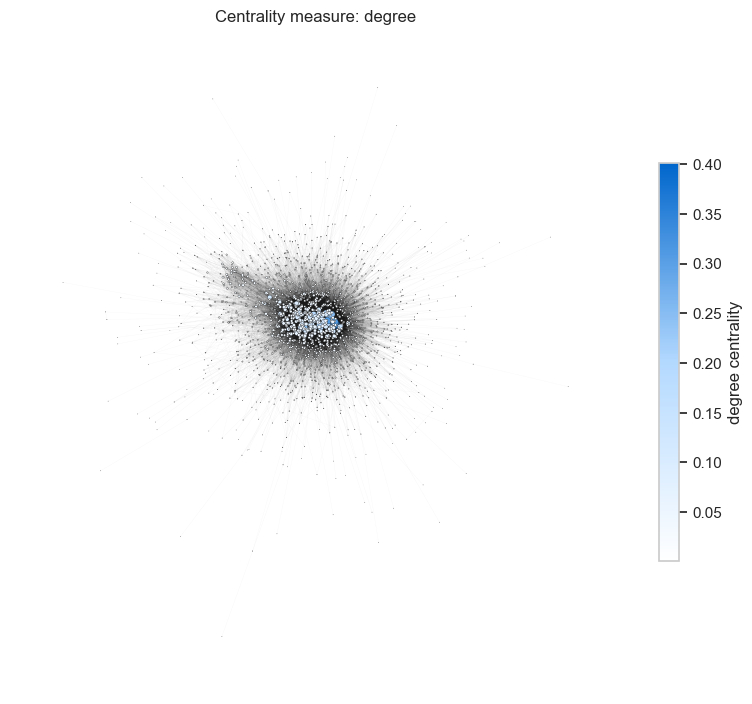

In [13]:
visualize_centrality(G=G, measure='degree')

The nodes with the highest degree centrality, which are found in the center of the graph, act as major players in the Twitch social media graph, connecting to a large portion of all other users and therefore playing a crucial role in holding the network together. These nodes are all <b> Twitch Partners </b> with extremely high view counts and long account histories, showing that visibility, popularity, and longevity strongly contribute to their central position in the network. Their high raw degrees, ranging from around 385 to 767 neighbors, indicate that they maintain an unusually large number of direct connections, giving them strong influence to the network especially when considering that the average degree is only around 32 neighbors. Interestingly, almost all of these highly connected nodes are non-mature channels, implying that potentially a lot of younger audiences are watching and supporting them.

#### Closeness Centrality


Top 10 nodes by closeness centrality:

 node  closeness   id  account_age_days  is_mature  total_views  is_partner
  127   0.600943  127              1592      False     32672093        True
 1297   0.568412 1297              2215      False      7724802        True
  467   0.565050  467              1774      False     11392773        True
  290   0.559590  290              1896      False    116392808        True
 1476   0.559426 1476              2195      False     18475754        True
   67   0.543515   67              1660       True      6905465        True
 1660   0.541667 1660              2024      False     33101623        True
 1593   0.529510 1593              1555      False      3094236        True
 1259   0.523705 1259              2153      False     17962557        True
  287   0.522702  287              2238       True      7443937        True



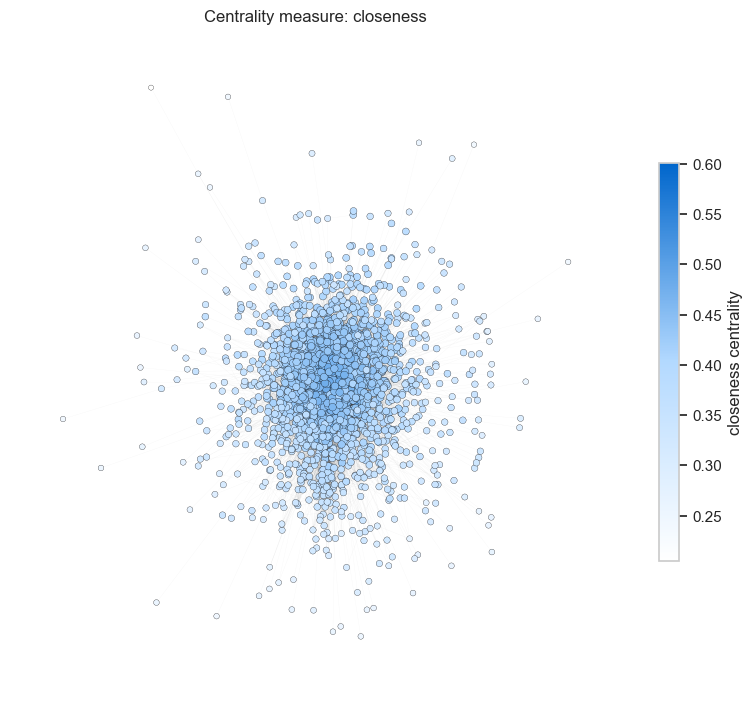

In [14]:
visualize_centrality(G=G, measure='closeness')

The nodes with the highest closeness centrality sit at the core of the Twitch social network in terms of distance: on average, they are only a few steps away from all other users, meaning they can reach the rest of the network very efficiently along short paths. All of these top-10 nodes are Twitch Partners, and they tend to have both high total views and relatively old accounts, which suggests that well-established, popular streamers are not only highly connected but also geographically central in the graph’s structure. Several nodes (like 127, 1297, 467, 290, 1476, 1660, 1259) appear among the top for both degree and closeness, reinforcing the idea that these are key players that are both well connected and well positioned to quickly interact with or influence many others. Again the majority of nodes are non-mature channels.

#### Eigenvector


Top 10 nodes by eigenvector centrality:

 node  eigenvector   id  account_age_days  is_mature  total_views  is_partner
  127     0.178778  127              1592      False     32672093        True
 1297     0.158668 1297              2215      False      7724802        True
  467     0.157239  467              1774      False     11392773        True
  290     0.151502  290              1896      False    116392808        True
 1476     0.145761 1476              2195      False     18475754        True
 1660     0.133757 1660              2024      False     33101623        True
   67     0.131181   67              1660       True      6905465        True
 1593     0.125898 1593              1555      False      3094236        True
 1320     0.118587 1320              2490      False     40659090        True
 1758     0.115409 1758              1359      False      4397521        True



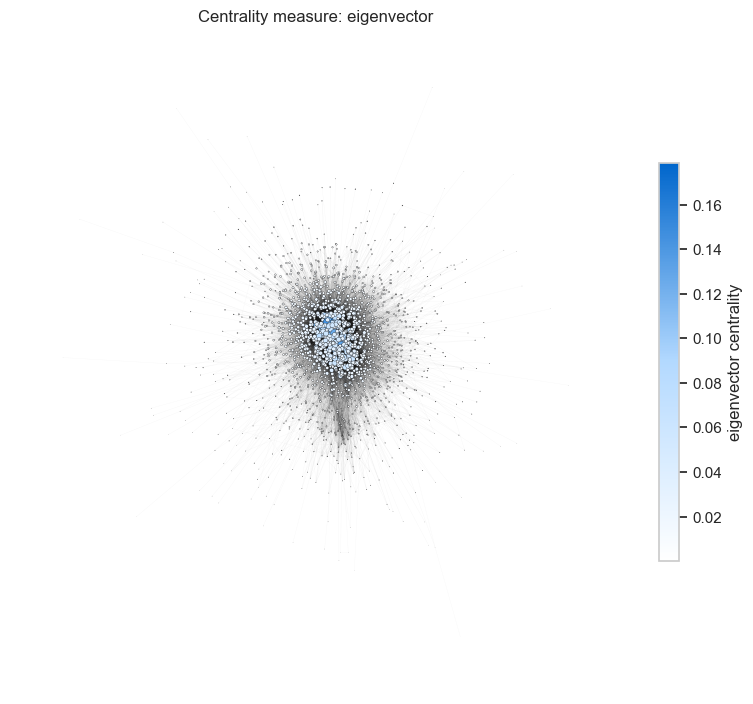

In [15]:
visualize_centrality(G=G, measure='eigenvector')

The nodes with the highest eigenvector centrality form a tightly connected core of highly influential streamers whose importance comes not just from how many neighbors they have, but from being connected to other important nodes. This top-10 list almost perfectly overlaps with the top nodes from degree and closeness centrality, meaning these users are not only well-connected and centrally located but also embedded in a cluster of other high-status users, which increases their influence in the network according to eigenvector theory. All of these nodes are Twitch Partners with large view counts and long account ages, showing that established, popular channels tend to reinforce each other's influence by collaborating and making group contect many times. Nodes like 127, 1297, 467, 290, and 1476 all lie in a rich, mutually reinforcing subgraph of prominent streamers. Together, these users form an elite cluster whose connections make them structurally powerful and highly influential across the graph.

#### Betweeness Centrality


Top 10 nodes by betweenness centrality:

 node  betweenness   id  account_age_days  is_mature  total_views  is_partner
  127     0.099261  127              1592      False     32672093        True
 1476     0.054895 1476              2195      False     18475754        True
 1297     0.050421 1297              2215      False      7724802        True
  290     0.050112  290              1896      False    116392808        True
  467     0.043825  467              1774      False     11392773        True
   67     0.034426   67              1660       True      6905465        True
 1660     0.026247 1660              2024      False     33101623        True
 1259     0.023295 1259              2153      False     17962557        True
  287     0.022121  287              2238       True      7443937        True
  428     0.021980  428               845       True       552640        True



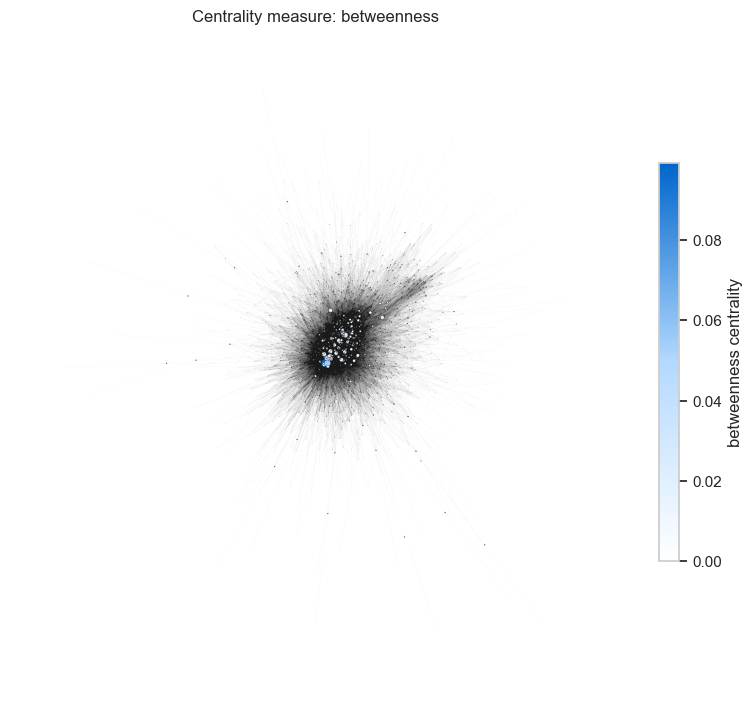

In [16]:
visualize_centrality(G=G, measure='betweenness')

The nodes with the highest betweenness centrality function as key bridges in the Twitch social network, sitting on a large number of the shortest paths that connect different parts of the graph. These users act as intermediaries of the information flow between communities and thus information is more likely to pass through them, giving them a form of information spread power. Similar to the other centrality measures, the top betweenness nodes are all Twitch Partners with significant view counts and generally older accounts. Nodes like 127, 1476, 1297, and 290 consistently appear across all centrality rankings, reinforcing their role as major players in the network. A notable difference is the extra presence of a few mature-content channels (67, 287, 428), suggesting that while mature channels may not be the most popular, some still serve as important bridges between content clusters.


#### Centrality - User Attribute correlation

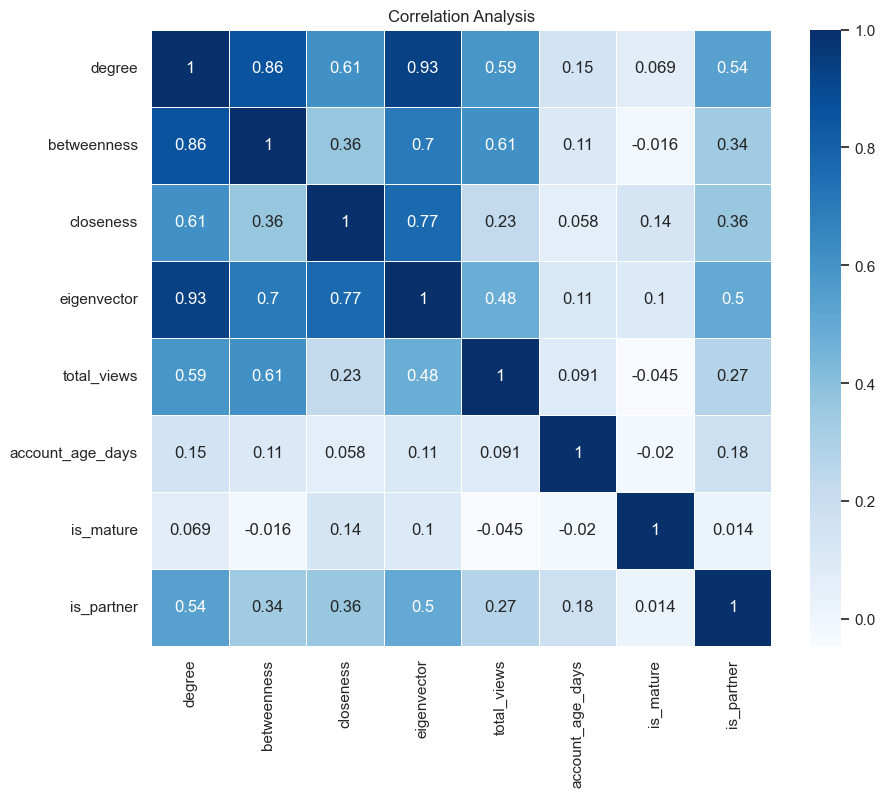

In [17]:
compare_centralities_with_attributes(G)

- Degree, eigenvector, and betweenness centrality are strongly correlated (0.86–0.93), indicating that the most connected users also tend to be the most influential within the network’s core and serve as important bridges of the information flow.

- Closeness centrality is moderately correlated with degree and eigenvector centrality (0.61–0.77), suggesting that nodes with many connections or influential neighbors also tend to be situated relatively close, in terms of path distance, to the rest of the network.

- Total views show moderate correlation with degree and betweenness (0.59–0.61), meaning popular streamers tend to be highly connected and sit on key pathways, but high popularity does not automatically guarantee a highly central structural position.

- Eigenvector centrality is the strongest single correlate of degree (0.93), reflecting how central players cluster together in the Twitch graph.

- Account age shows very weak correlation (0.05–0.15) with all centrality measures and with total views, implying that simply having an older account does not strongly determine structural importance or popularity.

- Partner status shows a moderate positive correlation degree and eigenvector centrality indicating that Twitch Partners tend to occupy more connected, influential positions in the network than non-partners.

### Community Detection
Similar to the community detection in the emails graph, we use the custom Composite Score to rank partitions:

$\text{Composite Score} = 0.4 \times (1 - \text{Conductance}) + 0.3 \times \text{Density} + 0.3 \times \text{Coverage}$

Again, we use the grid search approach to iterate through a range of hyperparameters for each algorithm:
- Louvain & Leiden: Resolution Parameter ($0.2$ to $5.0$).
- Spectral Clustering: Number of Clusters $k$ ($3$ to $65$).

- Selection: The "Best" model is selected purely based on the unsupervised Composite Score.


In [18]:
# Resolution-based Algorithms (Louvain / Leiden)
resolutions = np.linspace(0.2, 5.0, 50)
df_leiden = optimize_community_detection(G, "leiden", resolutions, ground_truth=None)
df_louvain = optimize_community_detection(G, "louvain", resolutions, ground_truth=None)

# Count-based Algorithms (Spectral)
k_values = range(3, 65, 2) 
df_spectral = optimize_community_detection(G, "spectral", k_values, ground_truth=None)

--- Optimizing leiden ---
leiden finished in 21.25 seconds.
--- Optimizing louvain ---
louvain finished in 12.75 seconds.
--- Optimizing spectral ---
spectral finished in 8.65 seconds.


### Hyperparameter Ranges

- Left Panel (Resolution Optimization):
    - This plot compares how Leiden (green) and Louvain (blue) behave as we change the resolution parameter from 0.2 to 5.0.
    - The peak in each curve marks the point where the algorithm produces the most stable and meaningful community structure based on the custom metric.
    - When the score drops sharply, it usually means the resolution is too high or too low, causing either:
        - Too many tiny clusters (over-fragmentation), or
        - One oversized cluster (under-segmentation)


- Right Panel (Cluster Count Optimization):
    - This plot shows how the quality score changes when Spectral Clustering is forced to create k clusters, ranging from 4 to 65.
    - The highest part of the curve indicates where Spectral Clustering performs best before quality gradually decreases with larger k.


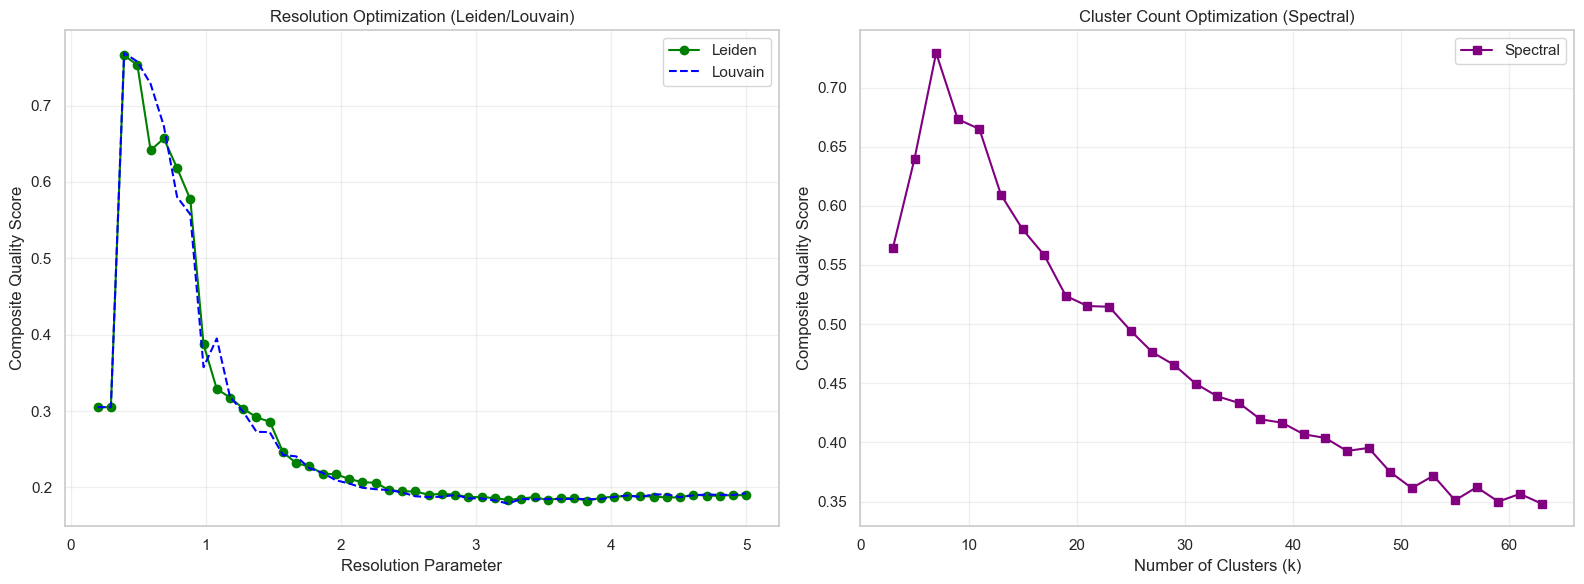

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(df_leiden['Param'], df_leiden['Composite_Score'], label='Leiden', color='green', marker='o')
ax1.plot(df_louvain['Param'], df_louvain['Composite_Score'], label='Louvain', color='blue', linestyle='--')
ax1.set_title("Resolution Optimization (Leiden/Louvain)")
ax1.set_xlabel("Resolution Parameter")
ax1.set_ylabel("Composite Quality Score")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(df_spectral['Param'], df_spectral['Composite_Score'], label='Spectral', color='purple', marker='s')
ax2.set_title("Cluster Count Optimization (Spectral)")
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Composite Quality Score")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Min 5 Communities

We exclude any models that produce fewer than 5 communities, since those would be too coarse (e.g., just a couple of large groups).

Using this filter, the best-scoring models come from Leiden and Louvain at similar settings.
Both algorithms form 6 communities, with strong structural scores:

- Composite Score: 0.77

- Conductance: 0.32

- Density: 0.69

- Coverage: 0.96–0.97

These values show that the partitions are structurally very strong.
However, because they create only 6 large clusters, they likely reflect broader twitch user communities

In [20]:
best_leiden = get_best_granular_model(df_leiden, min_communities=5)
best_louvain = get_best_granular_model(df_louvain, min_communities=5)
best_spectral = get_best_granular_model(df_spectral, min_communities=5)

# combine
summary_df = pd.DataFrame([best_leiden, best_louvain, best_spectral])
summary_df.set_index("Algorithm", inplace=True)

display_cols = ["Param", "Communities", "Composite_Score", "Conductance", "Density", "Coverage"]
final_view = summary_df[display_cols]

styled_table = final_view.style.background_gradient(
    cmap='Greens', subset=["Composite_Score", "Density", "Coverage"]
).background_gradient(
    cmap='Greens_r', subset=["Conductance"] # Low is good
).format("{:.4f}")

print("\nBest Granular Configurations (min 5 communities)")
display(styled_table)


Best Granular Configurations (min 5 communities)


,Param,Communities,Composite_Score,Conductance,Density,Coverage
Algorithm,,,,,,
Leiden,0.3959,6.0000,0.7656,0.3245,0.6873,0.9641
Louvain,0.3959,6.0000,0.7689,0.3236,0.6928,0.9685
Spectral,7.0000,7.0000,0.7293,0.3754,0.6438,0.9544


Next we can visualize the communities suggested from our algorithm:

Detected 6 communities using Leiden with resolution 0.3959.

=== COMMUNITY STATISTICS TABLE ===
community | num_nodes | % mature | % partner | median_views | avg_views | median_age_days | avg_age_days
--------------------------------------------------------------------------------------------------------
0         | 1748      | 35.4%    | 15.3%     | 7093.0       | 440677.0  | 1271.5          | 1292.8      
1         | 156       | 26.9%    | 7.1%      | 5342.0       | 71407.6   | 1831.0          | 1730.9      
2         | 2         | 0.0%     | 0.0%      | 936.5        | 936.5     | 1634.0          | 1634.0      
3         | 2         | 0.0%     | 0.0%      | 574.0        | 574.0     | 1570.0          | 1570.0      
4         | 2         | 0.0%     | 0.0%      | 6542.0       | 6542.0    | 396.0           | 396.0       
5         | 2         | 50.0%    | 0.0%      | 2077.0       | 2077.0    | 522.0           | 522.0       


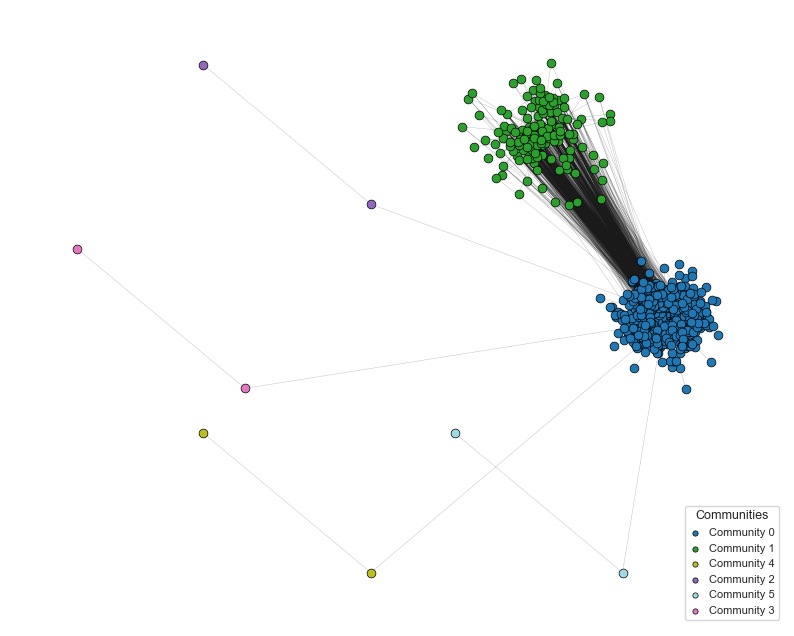

In [21]:
visualize_communities(G, method="leiden", resolution=0.3959)


Detected 6 communities using Louvain with resolution 0.3959.

=== COMMUNITY STATISTICS TABLE ===
community | num_nodes | % mature | % partner | median_views | avg_views | median_age_days | avg_age_days
--------------------------------------------------------------------------------------------------------
0         | 1776      | 35.1%    | 15.3%     | 6958.5       | 436557.6  | 1278.5          | 1298.0      
1         | 128       | 28.1%    | 5.5%      | 5600.5       | 47787.0   | 1878.0          | 1754.4      
2         | 2         | 0.0%     | 0.0%      | 6542.0       | 6542.0    | 396.0           | 396.0       
3         | 2         | 0.0%     | 0.0%      | 936.5        | 936.5     | 1634.0          | 1634.0      
4         | 2         | 50.0%    | 0.0%      | 2077.0       | 2077.0    | 522.0           | 522.0       
5         | 2         | 0.0%     | 0.0%      | 574.0        | 574.0     | 1570.0          | 1570.0      


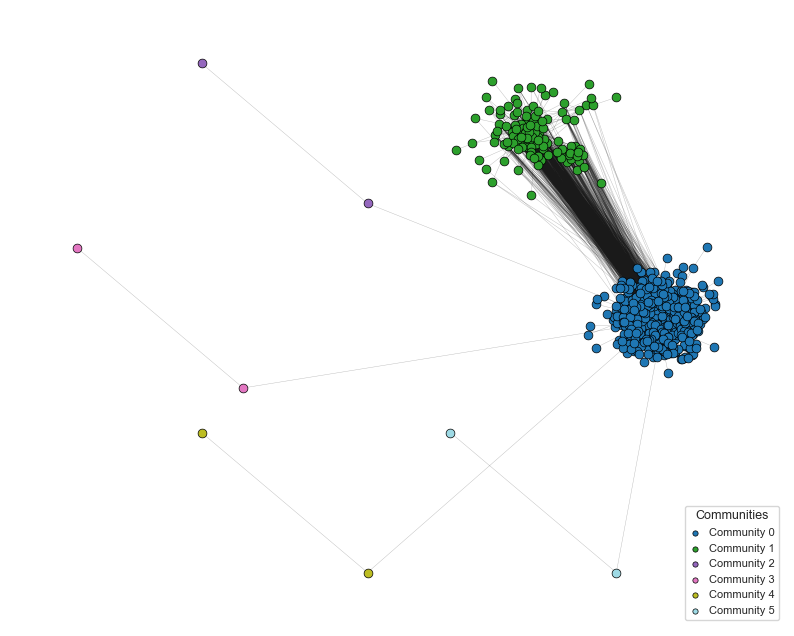

In [22]:
visualize_communities(G, method="louvain", resolution=0.3959)

##### Interpretation

Although this resolution setting gives the best custom metric scores for both Leiden and Louvain, the resulting communities are uneven and not very informative.

From the visualization:

- Two communities (blue and green) contain almost all nodes and form a dense, highly connected core.
- The remaining communities contain only a few isolated nodes each and sit far away from the center of the graph.
- These small clusters are essentially outliers.
- The massive size difference between clusters shows that, even though the algorithms score well on measures like conductance and coverage, the partition does not reflect any meaningful information.


##### Spectral

/Users/alfio/python_venv/general/lib/python3.13/site-packages/sklearn/cluster/_spectral.py:703: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/Users/alfio/python_venv/general/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/alfio/python_venv/general/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/alfio/python_venv/general/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/alfio/python_venv/general/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/alfio/python_venv/general/lib/python3.13/site-


=== COMMUNITY STATISTICS TABLE ===
community | num_nodes | % mature | % partner | median_views | avg_views  | median_age_days | avg_age_days
---------------------------------------------------------------------------------------------------------
0         | 972       | 36.1%    | 13.3%     | 6421.0       | 205370.7   | 1401.0          | 1377.5      
1         | 13        | 0.0%     | 100.0%    | 18534438     | 29856228.2 | 2024            | 1945.8      
2         | 501       | 36.9%    | 13.8%     | 6103         | 172034.0   | 1022            | 1156.1      
3         | 35        | 40.0%    | 11.4%     | 10911        | 139281.5   | 1732            | 1689.6      
4         | 299       | 30.8%    | 15.1%     | 7910         | 218401.7   | 1422            | 1392.8      
5         | 20        | 35.0%    | 5.0%      | 4226.5       | 184233.0   | 2090.5          | 1953.0      
6         | 72        | 16.7%    | 25.0%     | 6463.5       | 467518.5   | 961.0           | 1110.5      


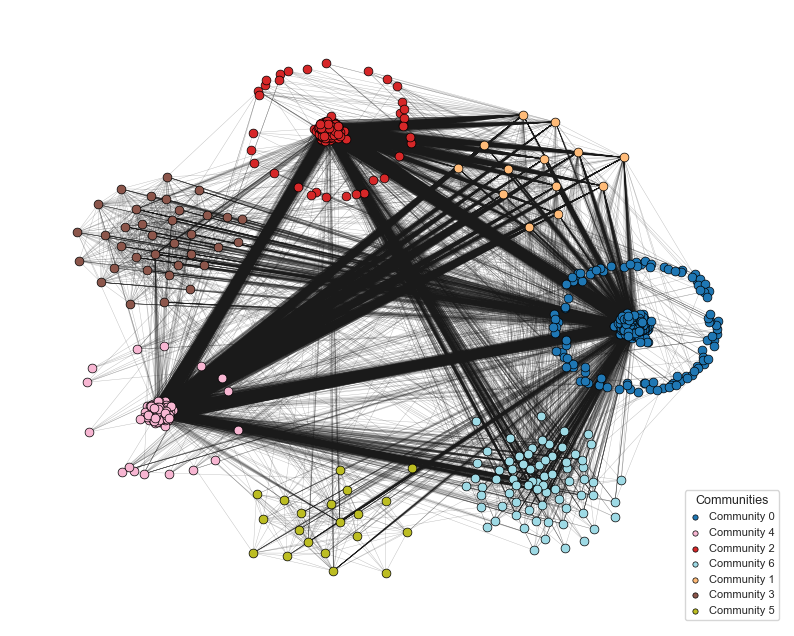

In [23]:
visualize_communities(G, method="spectral", k=7)

##### Insights Spectral

Spectral clustering creates Twitch comunities that are tightly connected on the inside and clearly separated from the rest of the network. The moderate conductance value means people in the same group mostly interact often with each other instead of outside users. The high density shows that these groups have lots of internal connections, making them feel like real communities.

A particularly interesting insight is the presence of special, highly distinctive clusters. The most striking being the community 1, composed entirely of Twitch Partners. This group is unusually small but extremely cohesive, with exceptionally high median and average view counts, long-established channels, and virtually no non-partner streamers mixed in. Spectral clustering isolates it cleanly because these creators share a very strong, exclusive interaction pattern typical of top-tier streamers. This makes the cluster stand out as an elite group within the network.

Another notable cluster is the group 3 with a very high mature/ adult profile percentage, where a large share of nodes represent older, long-running channels. These channels tend to have more stable audiences and deeper historical connections, which causes them to cluster together even if their view  aren't as extreme as the partner-only group.

A third interesting cluster is community 5, a small, low-view niche group that shows a unique behavioral signature compared to the rest of the network. Despite low median views, the channels in this cluster interact frequently among themselves, suggesting a tightly bonded niche community, maybe centered around a specific game genre, language, or streaming style, that is not very popular for other users.

##### Custom Louvain
After some experimentation of trial and error, the following resolution produced the most interpretable communities.

In [ ]:
visualize_communities(G, method="louvain", resolution=1)

Detected 7 communities using Louvain with resolution 1.

=== COMMUNITY STATISTICS TABLE ===
community | num_nodes | % mature | % partner | median_views | avg_views | median_age_days | avg_age_days
--------------------------------------------------------------------------------------------------------
0         | 160       | 20.6%    | 18.8%     | 6849.0       | 249059.9  | 1083.0          | 1187.4      
1         | 15        | 13.3%    | 6.7%      | 774          | 13512.3   | 1261            | 1334.5      
2         | 603       | 48.9%    | 18.9%     | 12510        | 264620.4  | 1388            | 1376.9      
3         | 432       | 28.2%    | 10.4%     | 3687.5       | 241778.1  | 1005.5          | 1122.3      
4         | 49        | 44.9%    | 0.0%      | 5638         | 19038.4   | 832             | 1077.3      
5         | 203       | 26.1%    | 7.4%      | 5196         | 66719.2   | 1720            | 1644.3      
6         | 450       | 29.8%    | 16.4%     | 7075.5       | 102871

In [19]:
print_single_model_metrics(G, method="louvain", resolution=1.0)


=== COMMUNITY QUALITY METRICS ===
Algorithm    | Composite  | Conductance  | Density  | Coverage
----------------------------------------------------------------------
Louvain      | 0.3723     | 0.5345       | 0.0777   | 0.5428  


##### Insights of Louvain Communities
Louvain finds a dense core made of communities 2, 3, and 6 and a sparser periphery. Community 2 is the largest (603 users) and a central one: about 48.9% of its channels are flagged as mature (adult-oriented content) and 18.9% are partners, with a median of 12,510 views and an average of 264k. Users here are slightly older (median age 1388 days). Community 6 (450 users) has 29.8% mature and 16.4% partners, median views around 7075, but a huge average of 1.03M views, suggesting a few celebrity channels that attract many mutual followers. Community 3 (432 users) is also central but more mixed, with 28.2% mature and 10.4% partners; its median of 3,688 views versus an average of 242k points to many small accounts clustered around a few bigger ones. Community 0 (160 users) is a somewhat younger cluster (median 1083 days) with only 20.6% mature but a very high 18.8% partner rate and mid-level views (median 6849, average 249k), hinting at groups,possibly around specific games or teams, where partnership is common even without extreme view counts.

On the periphery, communities 1, 4, and 5 contain smaller, less connected circles that likely mix minor streamers and mostly-viewer accounts. Community 5 (203 users) is the oldest group (median 1720 days) but has just 7.4% partners and low views (median 5196, avg 66k), resembling a pocket of long-time yet relatively small channels. Community 4 is tiny (49 users), young (median 832 days), and stands out for 44.9% mature but 0% partners and low views (median 5638, avg 19k), suggesting a niche adult-oriented subculture sitting at the network’s edge, which mostly act as viewers and not streamers. Community 1 is the smallest (15 users), with only 13.3% mature, 6.7% partners, and the lowest engagement (median 774, avg 13.5k views).

##### Metrics Louvain

The metrics changed from Conductance 0.32 -> 0.53, Density 0.69 -> 0.077, and Coverage 0.96 -> 0.54, which means the new community detection is less tightly connected internally (lower density) and captures fewer of the graph’s total edges (lower coverage), but the communities are much better separated from each other (improvement in conductance). In simple terms, the previous community detection found a few very dense, very large groups that swallowed most of the network, but were not cleanly separated, making them less meaningful. The current community detection instead produces communities that are more evenly sized, less tangled with each other, and more interpretable.


##### Custom Leiden

Detected 8 communities using Leiden with resolution 1.

=== COMMUNITY STATISTICS TABLE ===
+-----------+-----------+----------+-----------+--------------+-----------+-----------------+--------------+
| community | num_nodes | % mature | % partner | median_views | avg_views | median_age_days | avg_age_days |
+-----------+-----------+----------+-----------+--------------+-----------+-----------------+--------------+
|     0     |    480    |  34.0%   |   11.9%   |    5966.0    | 285960.7  |     1032.5      |    1138.3    |
|     1     |    468    |  51.3%   |   20.5%   |   14868.5    | 300647.0  |     1401.5      |    1391.4    |
|     2     |    366    |  29.0%   |   14.2%   |    6303.5    | 1131829.1 |     1538.0      |    1423.0    |
|     3     |    341    |  24.0%   |   15.5%   |     4146     | 217169.7  |      1137       |    1187.2    |
|     4     |    236    |  28.4%   |   8.5%    |    5193.0    |  63423.0  |     1724.0      |    1639.2    |
|     5     |    17     |  11.8%   | 

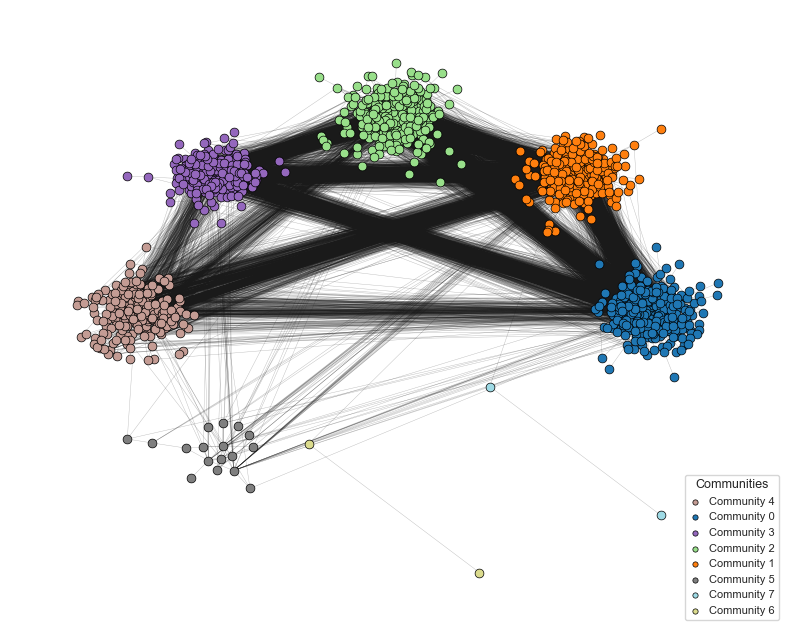

In [20]:
visualize_communities(G, method="leiden", resolution=1)


In [21]:
print_single_model_metrics(G, method="leiden", resolution=1.0)


=== COMMUNITY QUALITY METRICS ===
Algorithm    | Composite  | Conductance  | Density  | Coverage
----------------------------------------------------------------------
Leiden       | 0.4477     | 0.5036       | 0.2976   | 0.5327  


##### Insights of Leiden Communities

Among the 2 thousand users, five big communities (0–4) hold almost everyone, with three tiny ones (5–7) acting as outliers. Community 1 looks like the professional community: it contains many channels marked as mature/adult-oriented (51%), the highest partner rate (20.5%), strong median views (15k) and high averages, suggesting a core of established, adult-oriented streamers surrounded by their closely connected followers. Community 2 is also old and has a sizable share of mature-flagged channels (29%, with 14.2% partners), but a few very large channels push the average views above 1.1M while the median is only around 6.3k, indicating a small set of star streamers embedded in a broader mid-tier and viewer community.

Community 0 is the biggest group and seems to be the main mid-tier core: a medium share of mature-flagged channels (34%), moderate partner rate (11.9%), and median views around 6k, likely representing many reasonably active but not huge streamers plus their mutual-follow networks. Community 3 is similar in age, with slightly fewer mature-flagged channels (24%) and a solid partner share (15.5%) but lower typical views (4.1k), pointing to more niche or upcoming creators and their audiences. Community 4, by contrast, aggregates some of the oldest accounts (4.7 years) but has the lowest partner rate among the big groups (8.5%) and relatively low views, which fits a cluster of long-time but small-reach streamers and viewers who never coalesced around very popular channels. Overall, the partition highlights how different combinations of high-status streamers and ordinary users form particular communities.


##### Metrics Leiden

The new Leiden communities are much better separated from the rest of the graph. Simply, the new Leiden detection produces groups that are cleaner, less mixed, and easier to distinguish, without sacrificing much internal coherence. Compared to the new Louvain result, Leiden gives communities that are far denser and more structurally meaningful (density ***0.297 vs. 0.077*** which is a huge difference taking into account that we used the same resolution of 1), while maintaining similar separation and coverage-so Leiden’s communities are generally more cohesive and more interpretable than Louvain’s.

# Influence Maximization
Suppose we are a video game company that wants to advertise our new game. We want to choose which twitch users we can pay to sponsor the game
in their live streams, so that our reach is maximal. We expect that with a certain probability (P_influence) a twitch user that follows
another, that is playing the game, will start to play it too. If it's a streamer maybe he will start to do live streams on it,
while if it's a simple user, he might ask his favourite streamers to play that game. In both case, once a user is "infected" he will
try to "infect" its connected users.

Again this is a typical influence maximization.
For all details about the algorithm, please refer to what was done for the Europe email graph.

In [6]:
P_INFLUENCE = 1
MC_SIMULATIONS = 20
BUDGET = 5

seeds, final_spread = greedy(G, k=BUDGET, p=P_INFLUENCE, mc=MC_SIMULATIONS)
# seeds, final_spread = celf(G, k=BUDGET, p=P_INFLUENCE, mc=MC_SIMULATIONS)

print("-" * 50)
print(f"Optimal Seed Set S: {seeds}")
print(f"Estimated Total Spread: {final_spread:.2f} users, so {final_spread/G.number_of_nodes() * 100:.1f}% of the users")
print("-" * 50)



[Starting Greedy] Target seeds: 5 | Simulations: 20 | p: 1
  > Finding seed 1/5 (evaluating 1912 nodes)...


  0%|          | 0/1912 [00:00<?, ?it/s]

  > Seed 1 found: Node 0 (Marginal Gain: 1912.00) | Total Spread: 1912.00
  > Finding seed 2/5 (evaluating 1911 nodes)...


  0%|          | 0/1911 [00:00<?, ?it/s]

KeyboardInterrupt: 

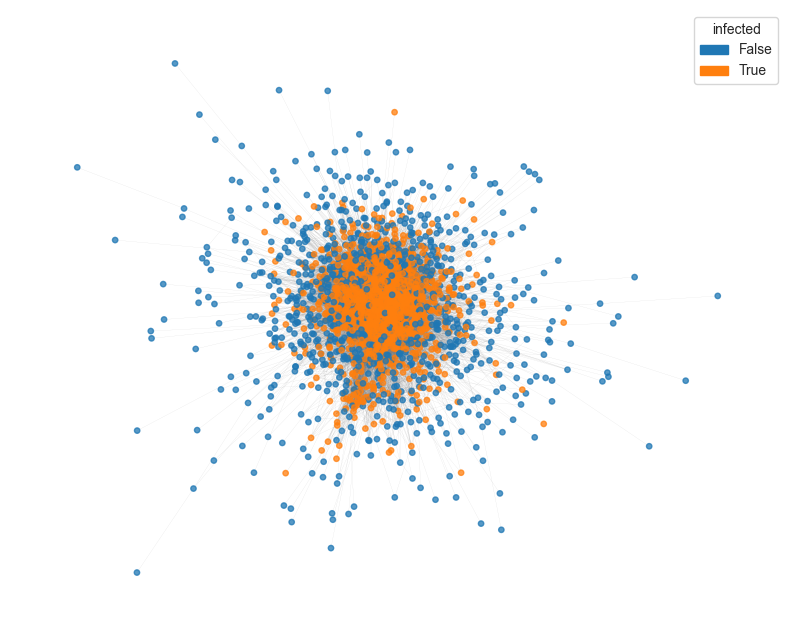

Percentage of infected nodes 55.1%


In [5]:
G_infected = simulate_and_tag_infection(G, seeds, p=P_INFLUENCE)
generic_show_static(G_infected, node_color='infected', node_size=15, k_core=0, width=10, height=8)
infected_count = sum(1 for node, data in G_infected.nodes(data=True) if data.get('infected') is True)
infected_percentage = infected_count / G_infected.number_of_nodes() * 100
print(f"Percentage of infected nodes {infected_percentage:.1f}%")